In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import animation
from sklearn.metrics import f1_score

In [2]:
# import data and initialize
chips = pd.read_csv(r'E:\task 3\chips.csv')
geyser = pd.read_csv(r'E:\task 3\geyser.csv')

chips['class'].replace({"P": 1, "N": -1}, inplace=True)
geyser['class'].replace({"P": 1, "N": -1}, inplace=True)

# divide train set and test set
y_chips = chips['class']
y_geyser = geyser['class']

X_chips = chips.drop(columns="class")
X_geyser = geyser.drop(columns="class")

X_chips_train, X_chips_test, y_chips_train, y_chips_test = train_test_split(X_chips, y_chips, test_size=0.2, random_state=42)
X_geyser_train, X_geyser_test, y_geyser_train, y_geyser_test = train_test_split(X_geyser, y_geyser, test_size=0.2, random_state=42)

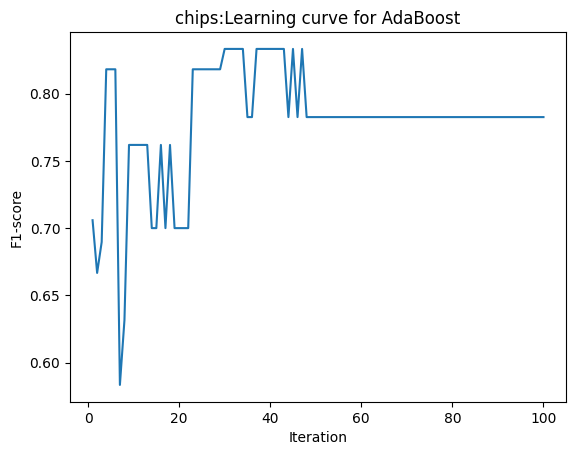

In [3]:
f1_scores = []
for i in range(1, 101):
    # Fit the model and predict
    base_learner = DecisionTreeClassifier(max_depth=1)
    Ensemble=AdaBoostClassifier(estimator=base_learner,n_estimators=i,random_state=42)
    Ensemble.fit(X_chips_train.values, y_chips_train.values)
    y_pred = Ensemble.predict(X_chips_test.values)    
    # Compute F1-score and save it
    f1 = f1_score(y_chips_test.values, y_pred)
    f1_scores.append(f1)
# Plot F1-score vs iteration
plt.plot(range(1, 101), f1_scores)
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('chips:Learning curve for AdaBoost')
plt.show()
    

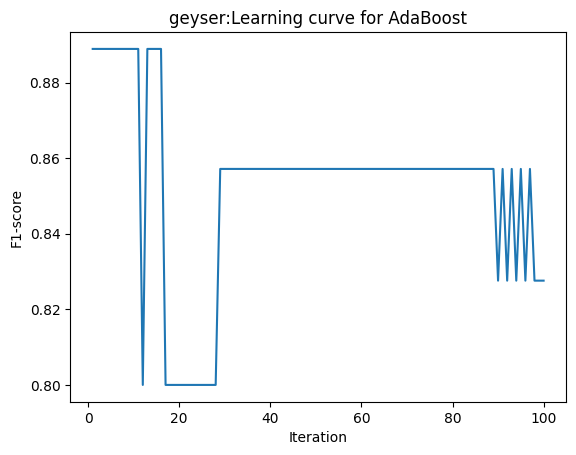

In [4]:
f2_scores = []
for i in range(1, 101):
    # Fit the model and predict
    base_learner = DecisionTreeClassifier(max_depth=1)
    Ensemble=AdaBoostClassifier(estimator=base_learner,n_estimators=i,random_state=42)
    Ensemble.fit(X_geyser_train.values, y_geyser_train.values)
    y_pred = Ensemble.predict(X_geyser_test.values)    
    # Compute F1-score and save it
    f2 = f1_score(y_geyser_test.values, y_pred)
    f2_scores.append(f2)
# Plot F1-score vs iteration
plt.plot(range(1, 101), f2_scores)
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('geyser:Learning curve for AdaBoost')
plt.show()   

2.use manually

In [5]:
def manually_ada(X,y,T):
    # initial 
    n_samples = len(X)
    wi= np.full(n_samples, 1/n_samples)
    hx=[]
    hx_weights=np.zeros(T)
    for t in range(T):
        at = DecisionTreeClassifier(max_depth=1)
        at.fit(X,y,sample_weight=wi)
        hx.append(at)
        #  Nt  weight error rate
        y_pred = at.predict(X)
        incorrect = (y_pred != y)
        Nt=np.average(incorrect, weights=wi, axis=0)
        # Cal_weight
        model_weight = 0.5 * np.log((1 -Nt ) /Nt)
        hx_weights[t]=model_weight
        wi*= np.exp(-model_weight * y * y_pred)
        wi/= np.sum(wi)
    return hx, hx_weights
# voting 
def predict_adaboost(models, model_weights, X):
    # Make predictions with all models
    y_pred_all = np.array([model.predict(X) for model in models])
    # Calculate the weighted sum of the predictions
    y_pred = np.sum(model_weights * y_pred_all.T, axis=1)
    # Return the sign of the sum
    return np.sign(y_pred)  #port
def plot_f1_score_and_model_weights(X_train, y_train, X_test, y_test, T):
    # List to store F1 scores and model weights
    f1_scores = []
    model_weights_list = []
    # For each iteration
    for i in range(1, T+1):
        models, model_weights = manually_ada(X_train, y_train, i)
        model_weights_list.append(np.mean(model_weights))
        y_pred = predict_adaboost(models, model_weights, X_test) #port
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, T+1), f1_scores)
    plt.xlabel('Iteration')
    plt.ylabel('F1-score')
    plt.title('Learning curve for AdaBoost')
    plt.tight_layout()
    plt.show()

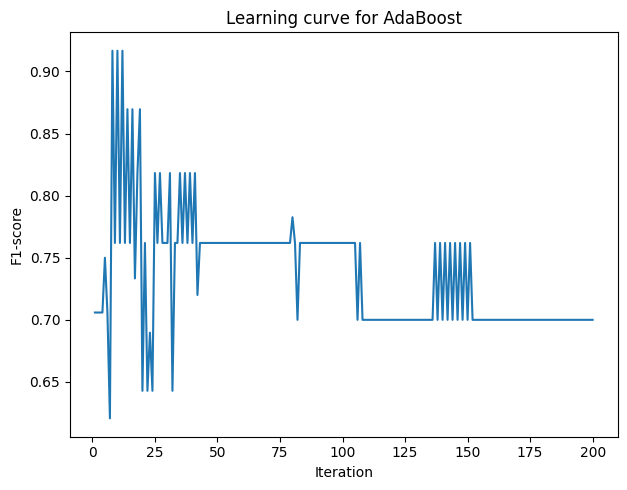

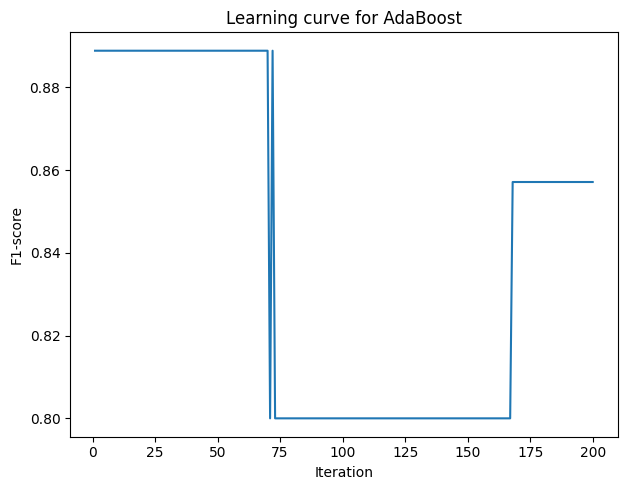

In [6]:
#Loop through sklearn calculations
plot_f1_score_and_model_weights(X_chips_train.values, y_chips_train.values, X_chips_test.values, y_chips_test.values,200)
plot_f1_score_and_model_weights(X_geyser_train.values, y_geyser_train.values, X_geyser_test.values, y_geyser_test.values,200) 